Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read in 2017-2021 player data (per game stats)

In [2]:
df1 = pd.read_csv('~/Desktop/NBA-Fantasy-Draft/data/PlayerStats/2016-17.csv')
df2 = pd.read_csv('~/Desktop/NBA-Fantasy-Draft/data/PlayerStats/2017-18.csv')
df3 = pd.read_csv('~/Desktop/NBA-Fantasy-Draft/data/PlayerStats/2018-19.csv')
df4 = pd.read_csv('~/Desktop/NBA-Fantasy-Draft/data/PlayerStats/2019-20.csv')
df5 = pd.read_csv('~/Desktop/NBA-Fantasy-Draft/data/PlayerStats/2020-21.csv')
frames = [df1, df2, df3, df4, df5]
df = pd.concat(frames)
df.head(10)

,PLAYER,POS,AGE,TEAM,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SEASON
0,Kent Bazemore,SF,27,ATL,73,64,26.9,4.0,9.9,0.409,...,0.6,2.5,3.2,2.4,1.2,0.7,1.7,2.3,11.0,2016-17
1,DeAndre' Bembry,SF,22,ATL,38,1,9.8,1.2,2.6,0.480,...,0.4,1.2,1.6,0.7,0.2,0.1,0.4,0.6,2.7,2016-17
2,Malcolm Delaney,PG,27,ATL,73,2,17.1,2.0,5.3,0.374,...,0.1,1.5,1.7,2.6,0.5,0.0,1.3,1.5,5.4,2016-17
3,Tim Hardaway,SG,24,ATL,79,30,27.3,5.3,11.5,0.455,...,0.4,2.4,2.8,2.3,0.7,0.2,1.3,1.3,14.5,2016-17
4,Dwight Howard,C,31,ATL,74,74,29.7,5.2,8.3,0.633,...,4.0,8.7,12.7,1.4,0.9,1.2,2.3,2.7,13.5,2016-17
5,Kris Humphries,PF,31,ATL,56,4,12.3,1.6,3.8,0.407,...,1.1,2.6,3.7,0.5,0.3,0.4,0.5,1.2,4.6,2016-17
6,Ryan Kelly,PF,25,ATL,16,0,6.9,0.5,1.8,0.286,...,0.1,1.1,1.1,0.5,0.3,0.3,0.3,0.3,1.6,2016-17
7,Paul Millsap,PF,31,ATL,69,67,34.0,6.2,14.1,0.442,...,1.6,6.1,7.7,3.7,1.3,0.9,2.3,2.7,18.1,2016-17
8,Mike Muscala,C,25,ATL,70,3,17.7,2.4,4.8,0.504,...,1.1,2.3,3.4,1.4,0.4,0.6,0.8,1.4,6.2,2016-17
9,Gary Neal,SG,32,ATL,2,0,9.0,0.0,3.5,0.000,...,0.0,0.5,0.5,0.5,0.0,0.0,0.0,0.5,2.0,2016-17


Since we're looking at which stats are most tightly correlated, let's filter out those stats specifically

In [3]:
corr_columns = ['FG%','FT%','3P','PTS','TRB','AST','STL','BLK','TOV']
corr_df = df[corr_columns]
corr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2603 entries, 0 to 533
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FG%     2592 non-null   float64
 1   FT%     2489 non-null   float64
 2   3P      2603 non-null   float64
 3   PTS     2603 non-null   float64
 4   TRB     2603 non-null   float64
 5   AST     2603 non-null   float64
 6   STL     2603 non-null   float64
 7   BLK     2603 non-null   float64
 8   TOV     2603 non-null   float64
dtypes: float64(9)
memory usage: 203.4 KB


Fill in missing values

In [4]:
corr_df = corr_df.fillna(0)

Plot histograms for each stat

<AxesSubplot:ylabel='Frequency'>

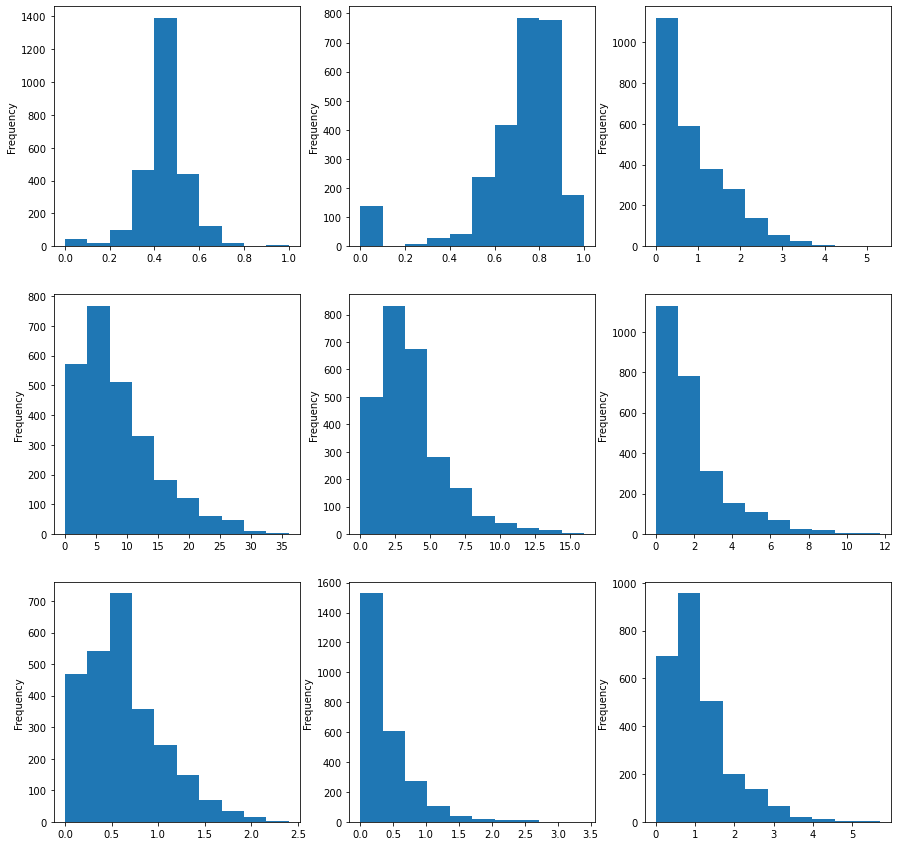

In [5]:
fig, axs = plt.subplots(3,3,figsize=(15,15))
corr_df['FG%'].plot(kind='hist', ax=axs[0,0])
corr_df['FT%'].plot(kind='hist', ax=axs[0,1])
corr_df['3P'].plot(kind='hist', ax=axs[0,2])
corr_df['PTS'].plot(kind='hist', ax=axs[1,0])
corr_df['TRB'].plot(kind='hist', ax=axs[1,1])
corr_df['AST'].plot(kind='hist', ax=axs[1,2])
corr_df['STL'].plot(kind='hist', ax=axs[2,0])
corr_df['BLK'].plot(kind='hist', ax=axs[2,1])
corr_df['TOV'].plot(kind='hist', ax=axs[2,2])

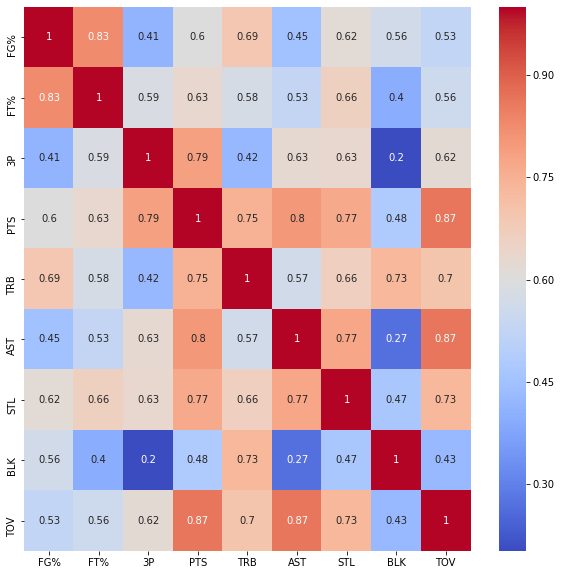

In [28]:
fig, ax = plt.subplots(figsize=(10,10))
sns_plot = sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm', fmt='.2g', ax=ax)
fig = sns_plot.get_figure()

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [21]:
calc_vif(corr_df)

,variables,VIF
0,FG%,13.154546
1,FT%,12.524651
2,3P,6.485508
3,PTS,20.198311
4,TRB,9.742589
5,AST,9.188839
6,STL,7.376752
7,BLK,3.924265
8,TOV,12.668902


Based on this data, punting blocks seems like the best option... the histogram shows that the vast majority of players average less than 0.5 blocks per game - this means there are few elite shot blockers and they're likely to get draftd early on. Furthermore, blocks are least co-linear with most other categories and therefore can be punted with little consequence. Total rebounds does take a hit, however, there are quite a few bigs that are weak shot-blockers.